In [124]:
from selenium import webdriver
import time
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
game_url = 'https://play.google.com/store/apps/details?id=it.rortos.airfighters&showAllReviews=true'
param_option = webdriver.ChromeOptions()
chromedriver = r'chromedriver.exe'
driver = webdriver.Chrome(chromedriver, options=param_option)
driver.get(game_url)
rating=[]
reviews = WebDriverWait(driver, 10).until(EC.visibility_of_all_elements_located((By.XPATH, "//h3[.='User reviews']/following-sibling::div[1]/div")))
for review in reviews:
    try:
        rating.append(review.find_element_by_xpath(".//div[@role='img']").get_attribute('aria-label'))
    except:
        continue
review_content_text = soup.find_all('div',{'class', 'UD7Dzf'})
review_content_text_list = []
for val in review_content_text:
    review_content_text_list.append(val.get_text())

In [143]:
for i in range(len(rating)):
    rating[i]=int(re.findall('\d',rating[i])[0])

In [162]:
df=pd.DataFrame({"Review":review_content_text_list,"Rating":rating})

In [163]:
df

Review  Rating
0    It's the best game I have ever played in my l...       5
1    The most best game EVER but 1 thing is missin...       5
2    Can't back up. My data.... That's why giving ...       5
3    No options for controls. Poor graphics. Ace f...       5
4    I have downloaded this game twice now on my S...       3
5    Well it becomes very realistic when we can us...       1
6    Loading and loading..loading and loading.. Wa...       4
7    It's been two years but no new aircraft has b...       5
8    Graphics are not good. But it is good for tim...       5
9    This is the biggest air plane shooting game i...       4
10   It's a great experience its a super game Effe...       5
11   Nice but the graphic should improve and when ...       5
12   Simuletar is good nothing ,radar ,close visan...       5
13   This is a good game. But this game only run i...       2
14   Very good Game Playing for Long time But now ...       4
15   Hi chau your email address is being protected...       4
16   giving 1 star, wouldve given 0 if i could bec...       5
17   Controls are good , graphics poor , game them...       4
18   It's really good I have played almost all fre...       4
19   good , map size should be minimized , at shoo...       3
20   I like this game a lot. But the problem is th...       1
21   1 star short to 5 stars because it lacks "Tac...       5
22   Best fighter game ever played but some issues...       5
23   Feel that I am flying & controlling the jet f...       1
24   This games is tooo!!good cuz the graphics are...       3
25   You get very less options to play. You need t...       4
26   The game is by far entertaining than what's c...       4
27   I'm playing this game for 2 years. Still I ca...       5
28   Get rid of the Su57 and get planes like Mig 2...       5
29   This is an ex exceptional game ,its not just ...       4
30   it's a really good game with really good sand...       1
31   Whenever I land to airbase the plane is not s...       5
32   Just missing one thing: RUDDER CONTROL. Almos...       4
33   Should increase quality of bvr fight and long...       1
34   It was a great game when I first played it..B...       5
35   You can play this game for just a week becaus...       5
36   Every component of the game is superb but the...       3
37   At the begining of the I liked the game, but ...       4
38   It is a good game but after 1week of uising i...       3
39   This is till now the best air combat simulato...       1

In [173]:
postive_review=df[df.Rating==5]
negative_review=df[df.Rating==1]

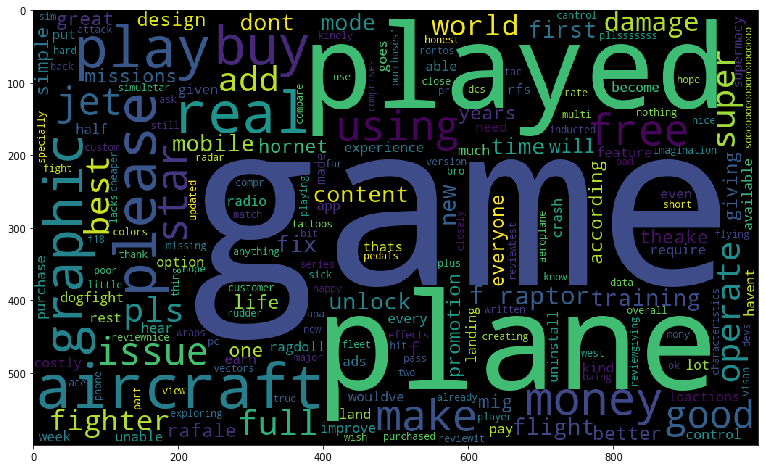

In [182]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
comment_words = ''
stopwords = set(STOPWORDS)
for itr in postive_review.Review:
    itr = str(itr)
    tokens = itr.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 1000, height = 600,background_color ='black',stopwords = stopwords,min_font_size = 10).generate(comment_words)
plt.figure(figsize = (16, 8))
plt.imshow(wordcloud)
plt.savefig('positive_review_wordcloud.png')
plt.show()

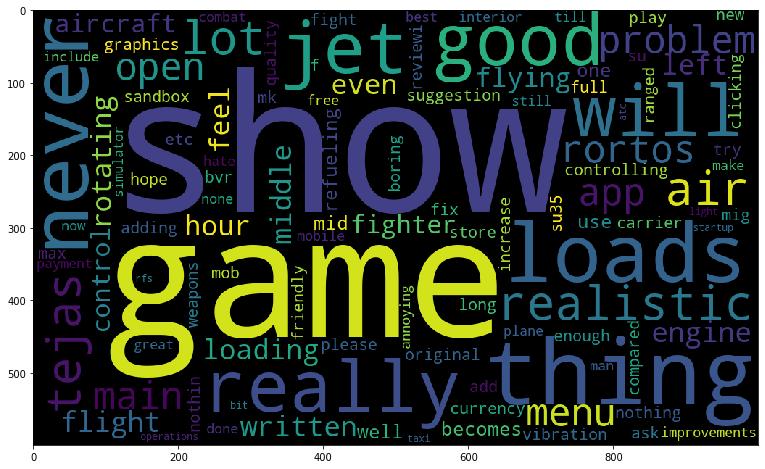

In [186]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
comment_words = ''
stopwords = set(STOPWORDS)
for itr in negative_review.Review:
    itr = str(itr)
    tokens = itr.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 1000, height = 600,background_color ='black',stopwords = stopwords,min_font_size = 10).generate(comment_words)
plt.figure(figsize = (16, 8))
plt.imshow(wordcloud)
plt.savefig('negative_review_wordclouds.png')
plt.show()

In [185]:
postive_review.head(1).to_html(classes='postive')

'<table border="1" class="dataframe postive">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Review</th>\n      <th>Rating</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>It\'s the best game I have ever played in my life. But, there is an issue. The is only one aircraft to operate. That\'s F-18 super hornet. So, please make theake the game simple and make it like everyone can operate any aircraft after promotion. Like Rafale and F-22 Raptor. Please design it according ...Full ReviewIt\'s the best game I have ever played in my life. But, there is an issue. The is only one aircraft to operate. That\'s F-18 super hornet. So, please make theake the game simple and make it like everyone can operate any aircraft after promotion. Like Rafale and F-22 Raptor. Please design it according to my imagination.</td>\n      <td>5</td>\n    </tr>\n  </tbody>\n</table>'